In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df = pd.read_csv('data/Data_for_Values_1.csv')
df

,Country,Age,Salary,Purchased
0,France,44,72000,No
1,Spain,27,48000,Yes
2,Germany,30,54000,No
3,Spain,38,61000,No
4,Germany,40,1000,Yes
5,France,35,58000,Yes
6,Spain,38,52000,No
7,France,48,79000,Yes
8,Germany,50,83000,No
9,France,37,67000,Yes


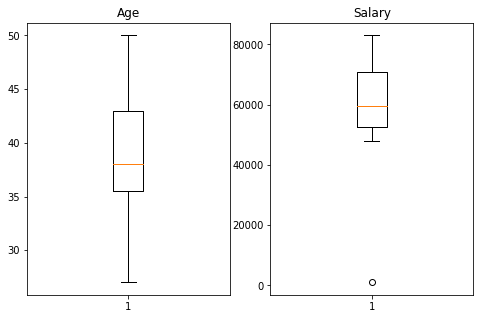

In [4]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.boxplot(df['Age'])
plt.title('Age')
plt.subplot(1,2,2)
plt.boxplot(df['Salary'])
plt.title('Salary')
plt.show()

c:\program files\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


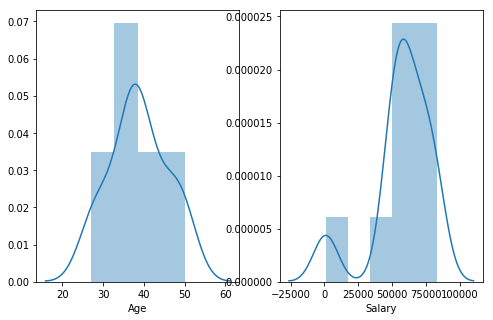

In [5]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sb.distplot(df['Age'])
plt.subplot(1,2,2)
sb.distplot(df['Salary'])
plt.show()

In [6]:
df_new = df[['Age', 'Salary']]

In [7]:
from sklearn import preprocessing

In [8]:
robust_scale = preprocessing.RobustScaler()

In [9]:
df_scale = robust_scale.fit_transform(df_new)
df_scale = pd.DataFrame(df_scale, columns=['Age','Salary'])
df_scale

,Age,Salary
0,0.800000,0.684932
1,-1.466667,-0.630137
2,-1.066667,-0.301370
3,0.000000,0.082192
4,0.266667,-3.205479
5,-0.400000,-0.082192
6,0.000000,-0.410959
7,1.333333,1.068493
8,1.600000,1.287671
9,-0.133333,0.410959


In [10]:
df['Age'].median(), df['Age'].std()

(38.0, 7.257945837341153)

In [11]:
df_scale['Age'].median(), df_scale['Age'].std()

(0.0, 0.9677261116454872)

In [12]:
df['Salary'].median(), df['Salary'].std()

(59500.0, 22974.623682083093)

In [13]:
df_scale['Salary'].median(), df_scale['Salary'].std()

(0.0, 1.2588834894292107)

c:\program files\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


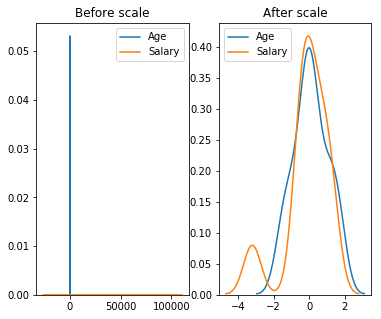

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6,5))
ax1.set_title('Before scale')
sb.kdeplot(df['Age'], ax=ax1)
sb.kdeplot(df['Salary'], ax=ax1)
ax2.set_title('After scale')
sb.kdeplot(df_scale['Age'], ax=ax2)
sb.kdeplot(df_scale['Salary'], ax=ax2)
plt.show()